In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/subject-0/subject_00.mat


https://zenodo.org/record/2348892#.X6M62VNKiu7

Download .mat file for subject 0.

In [40]:
from scipy.io import loadmat

#use scipy package to load mat file
data=loadmat('/kaggle/input/subject-0/subject_00.mat')

In [41]:
#data is a dictionary, the actual data we want is stored in the 'SIGNAL' header
data_array=data['SIGNAL']

#create dataframe from our data
df=pd.DataFrame(data_array)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,2314.710938,-2473.864258,304.726593,-6740.526367,-6507.790039,-11247.854492,-2859.524170,-14004.568359,-1706.199707,-4104.730469,-6290.920410,-12415.869141,-7290.736816,170.436508,397.110260,-3278.888184,0.0,0.0
1,0.001953,2312.077393,-2477.192871,295.271210,-6747.804199,-6508.391602,-11249.747070,-2863.340820,-14008.770508,-1708.395874,-4104.203613,-6288.968262,-12418.380859,-7293.556641,175.323837,400.196503,-3276.674561,0.0,0.0
2,0.003906,2308.139160,-2477.750000,292.862305,-6750.519043,-6510.719238,-11248.869141,-2867.504883,-14007.042969,-1709.802368,-4105.119141,-6274.008301,-12422.494141,-7294.418945,193.758057,410.232483,-3263.133545,0.0,0.0
3,0.005859,2303.175293,-2477.378174,296.507050,-6756.901856,-6515.480957,-11250.728516,-2872.019775,-14011.469727,-1709.260498,-4109.889648,-6266.696777,-12422.033203,-7302.818848,197.839844,410.054993,-3260.899902,0.0,0.0
4,0.007812,2307.331543,-2471.294434,301.831573,-6754.847656,-6509.622070,-11247.145508,-2865.405518,-14011.854492,-1702.394165,-4102.324707,-6257.812012,-12413.977539,-7298.030273,200.905090,415.010742,-3255.357422,0.0,0.0


In [42]:
#assign names to time and task columns
df=df.rename(columns={0:'time',17:'task 1',18:'task 2'})
df.head()

,time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,task 1,task 2
0,0.000000,2314.710938,-2473.864258,304.726593,-6740.526367,-6507.790039,-11247.854492,-2859.524170,-14004.568359,-1706.199707,-4104.730469,-6290.920410,-12415.869141,-7290.736816,170.436508,397.110260,-3278.888184,0.0,0.0
1,0.001953,2312.077393,-2477.192871,295.271210,-6747.804199,-6508.391602,-11249.747070,-2863.340820,-14008.770508,-1708.395874,-4104.203613,-6288.968262,-12418.380859,-7293.556641,175.323837,400.196503,-3276.674561,0.0,0.0
2,0.003906,2308.139160,-2477.750000,292.862305,-6750.519043,-6510.719238,-11248.869141,-2867.504883,-14007.042969,-1709.802368,-4105.119141,-6274.008301,-12422.494141,-7294.418945,193.758057,410.232483,-3263.133545,0.0,0.0
3,0.005859,2303.175293,-2477.378174,296.507050,-6756.901856,-6515.480957,-11250.728516,-2872.019775,-14011.469727,-1709.260498,-4109.889648,-6266.696777,-12422.033203,-7302.818848,197.839844,410.054993,-3260.899902,0.0,0.0
4,0.007812,2307.331543,-2471.294434,301.831573,-6754.847656,-6509.622070,-11247.145508,-2865.405518,-14011.854492,-1702.394165,-4102.324707,-6257.812012,-12413.977539,-7298.030273,200.905090,415.010742,-3255.357422,0.0,0.0


In [43]:
#dataframe of all start times for task 1
task_1=df[df['task 1']!=0][['time','task 1']]
task_1

,time,task 1
8351,16.310547,1.0
19460,38.007812,1.0
31435,61.396484,1.0
41698,81.441406,1.0
51722,101.019531,1.0


Time of task 1 changes

In [44]:
df['task 1'].value_counts()

0.0    63099
1.0        5
Name: task 1, dtype: int64

5 different changes in task 1

In [45]:
#dataframe of all start times for task 2
task_2=df[df['task 2']!=0][['time','task 2']]
task_2

,time,task 2
13864,27.078125,1.0
25677,50.150391,1.0
36685,71.650391,1.0
46900,91.601562,1.0
56838,111.011719,1.0


Time of task 2 changes

In [46]:
df['task 2'].value_counts()

0.0    63099
1.0        5
Name: task 2, dtype: int64

5 changes in task 2

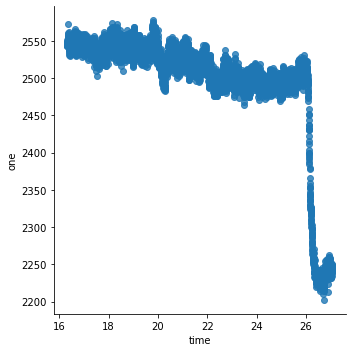

In [47]:
#sample visual showing electrode one amplitude vs. time from initial start of taask 1 to first start of task 2
import seaborn as sns
first=df.iloc[task_1.index[0]:task_2.index[0]].rename(columns={1:'one'})
sns.lmplot(x='time',y='one',data=first,fit_reg=False)

Label data so we can feed it into a machine learning model.

In [48]:
#create new dataframe so that old one is saved (we will edit this one)
ml_df=pd.DataFrame(df)

In [49]:
#change task columns so a 1 indicates whenever a particular task is being performed
ml_df['task 1'][task_1.index[0]:task_2.index[0]+1]=1.0
ml_df['task 2'][task_2.index[0]:task_1.index[1]+1]=1.0
ml_df['task 1'][task_1.index[1]:task_2.index[1]+1]=1.0
ml_df['task 2'][task_2.index[1]:task_1.index[2]+1]=1.0
ml_df['task 1'][task_1.index[2]:task_2.index[2]+1]=1.0
ml_df['task 2'][task_2.index[2]:task_1.index[3]+1]=1.0
ml_df['task 1'][task_1.index[3]:task_2.index[3]+1]=1.0
ml_df['task 2'][task_2.index[3]:task_1.index[4]+1]=1.0
ml_df['task 1'][task_1.index[4]:task_2.index[4]+1]=1.0
ml_df['task 2'][task_2.index[4]:]=1.0

In [50]:
ml_df['task 1'].value_counts()

0.0    35801
1.0    27303
Name: task 1, dtype: int64

In [51]:
ml_df['task 2'].value_counts()

0.0    35645
1.0    27459
Name: task 2, dtype: int64

<Figure size 360x360 with 0 Axes>

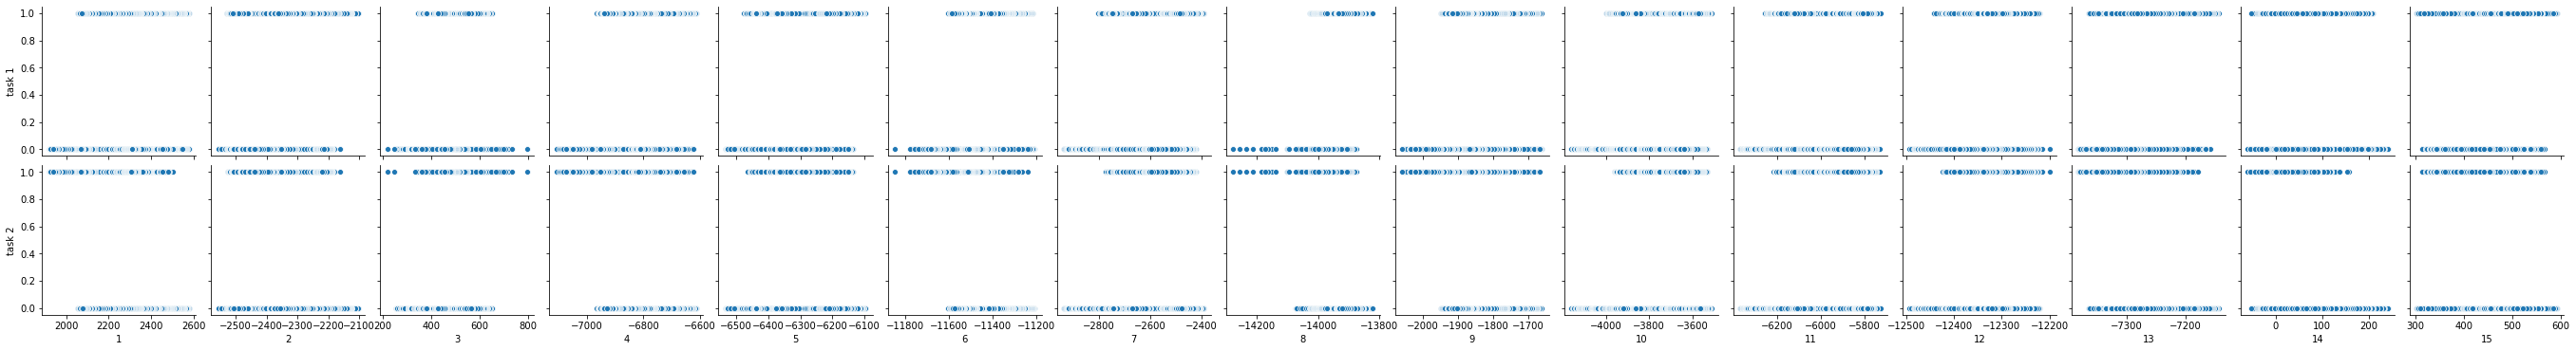

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between inputs and outputs
plt.figure(figsize=(5,5))
sns.pairplot(data=df, y_vars=['task 1','task 2'],
             x_vars=ml_df.columns[1:16])
plt.show()

In [53]:
#X is the inputs for the model, y is the dependent variable or the metric we are predicting
X=ml_df[ml_df.columns[1:16]]
y=ml_df['task 1']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#split into training and validation/testing data
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)

#define model
basic_model = DecisionTreeRegressor(random_state=1)

#fit model
basic_model.fit(train_X, train_y)

#make predictions
predictions=basic_model.predict(val_X)

In [55]:
#predictions is an array of 1's and 0's
predictions

array([0., 0., 0., ..., 1., 1., 0.])

In [56]:
#lot of different ways you can evaluate how accurate the model is
#here I am making a dataframe with one column the actual values for task 1 and one column the predicted values
comparison_df=pd.DataFrame(val_y)
comparison_df['predictions']=predictions

In [57]:
#compare the two columns, then put it in a series so that we can use .value_counts() so see how many are true false
pd.Series(comparison_df['task 1']==comparison_df['predictions']).value_counts()

True     24598
False      644
dtype: int64

In [58]:
#this is the accuracy
24598/(24598+644)

0.9744869661674986